In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('train - train.csv')
data['Order Date'] = pd.to_datetime(data['Order Date'], format= '%d/%m/%Y')
data['Sales'] = data['Sales'].str.replace(',', '.')
data['Sales'] = data['Sales'].astype(float)
data.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13


 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [21]:
sub_category_counts = data['Sub-Category'].value_counts()
sub_category_counts

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

Вывод: наиболее часто приобретаемые товары за всё время продаж: Binders, Paper, Furnishings, Phones

 Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [22]:
last_date = data['Order Date'].max()
two_years = last_date - pd.DateOffset(years = 2)
two_years

Timestamp('2016-12-30 00:00:00')

In [23]:
two_year_data = data[data['Order Date'] >= two_years]
two_year_data.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13


In [24]:
two_years_counts = two_year_data['Sub-Category'].value_counts()
two_years_counts

Sub-Category
Binders        907
Paper          810
Furnishings    558
Phones         511
Storage        492
Art            458
Accessories    450
Chairs         348
Appliances     274
Labels         208
Tables         189
Envelopes      131
Bookcases      130
Fasteners      122
Supplies       118
Machines        66
Copiers         36
Name: count, dtype: int64

Вывод: наиболее часто приобретаемые товары за последние 2 года: Binders, Paper, Furnishings, Phones

Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [25]:
one_year = last_date - pd.DateOffset(years = 1)
one_year

Timestamp('2017-12-30 00:00:00')

In [26]:
one_year_data = data[data['Order Date'] >= one_year]
one_year_data.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13


In [27]:
one_year_counts = one_year_data['Sub-Category'].value_counts()
one_year_counts

Sub-Category
Binders        496
Paper          454
Furnishings    310
Phones         291
Storage        283
Art            282
Accessories    266
Chairs         188
Appliances     161
Labels         114
Tables         104
Bookcases       76
Envelopes       71
Fasteners       63
Supplies        59
Machines        33
Copiers         22
Name: count, dtype: int64

Вывод: наиболее часто приобретаемые товары за последний год: Binders, Paper, Furnishings, Phones

 Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

Text(0.5, 0, 'Количество продаж')

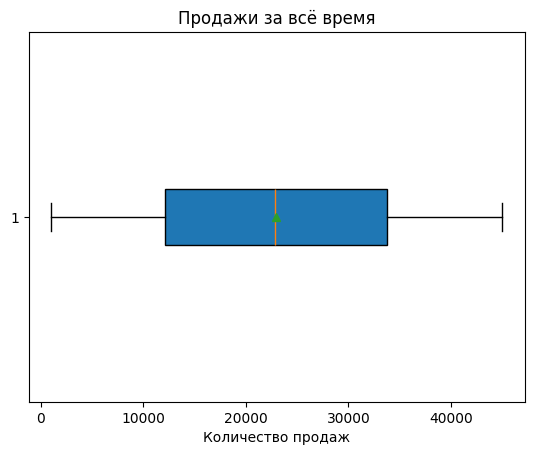

In [28]:
sales = data['Sales']
mean_value = sales.mean()
std_value = sales.std()
threshold_value = 3 * std_value
clean_sales = sales[(sales > mean_value - threshold_value) & (sales < mean_value + threshold_value)]
plt.boxplot(clean_sales, vert=False, patch_artist=True, showmeans=True)
plt.title('Продажи за всё время')
plt.xlabel('Количество продаж')

Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

In [29]:
data['Sale_group'] = pd.cut(clean_sales, bins=[0, 10000, 20000, float('inf')],
                            labels=["Маленькие", "Средние", "Высокие"], include_lowest = True)

In [30]:
data.head()

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08,Высокие
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,Высокие
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86,Высокие
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.00,Средние
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13,Высокие


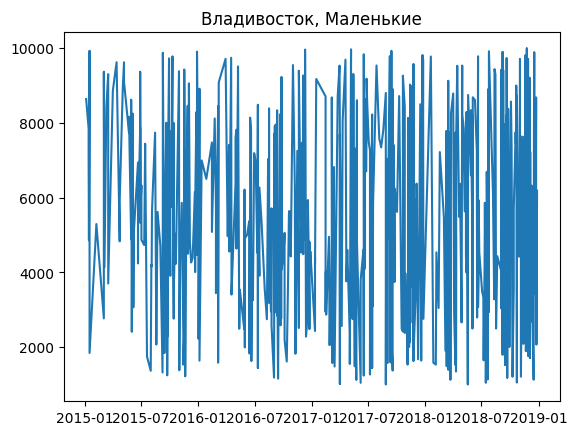

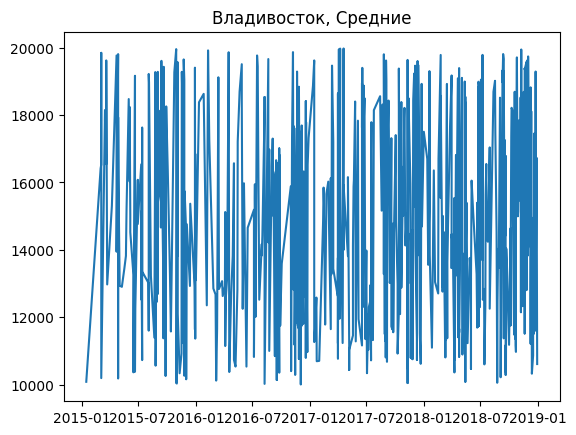

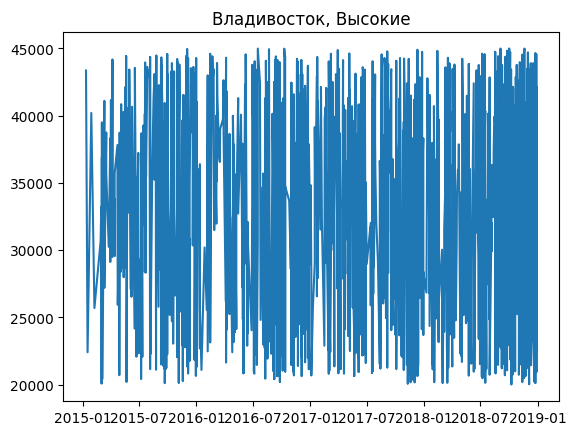

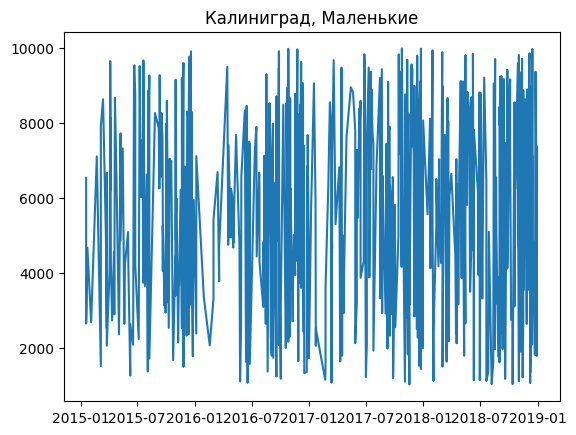

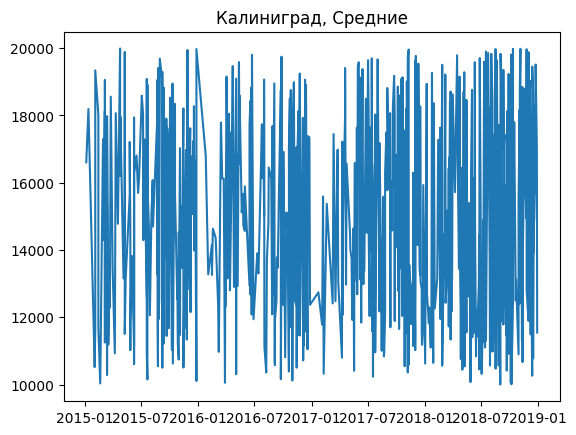

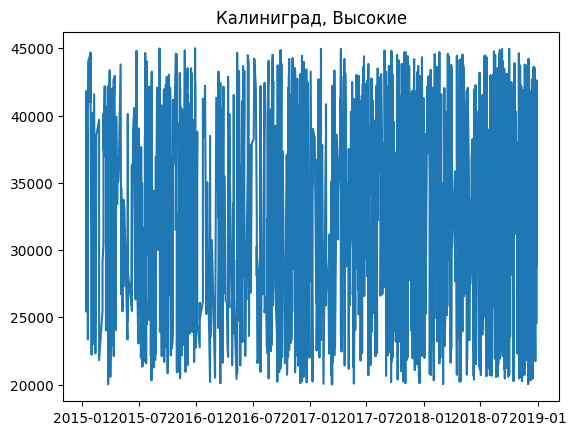

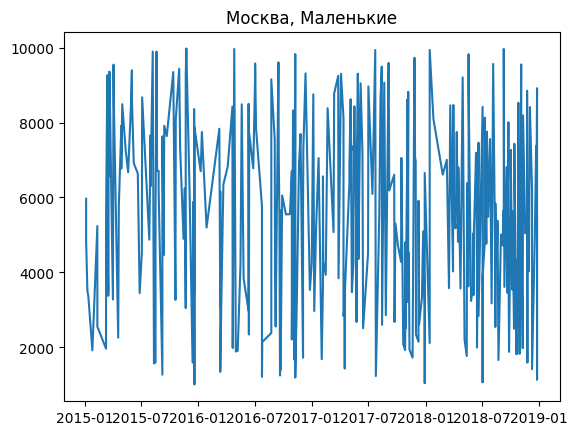

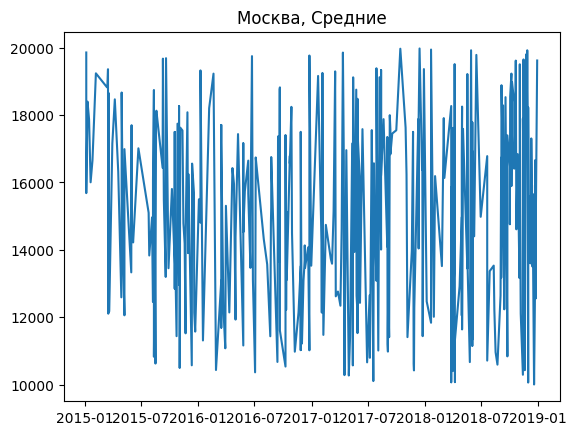

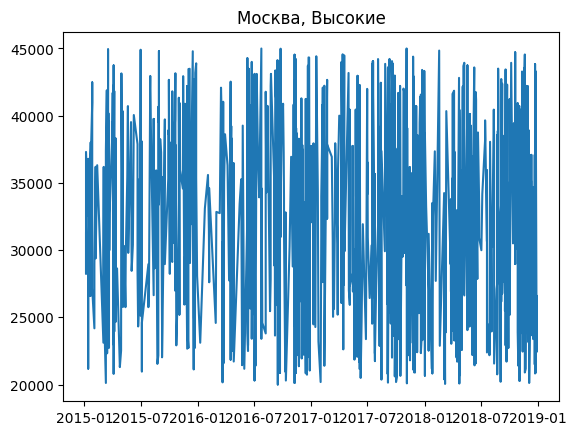

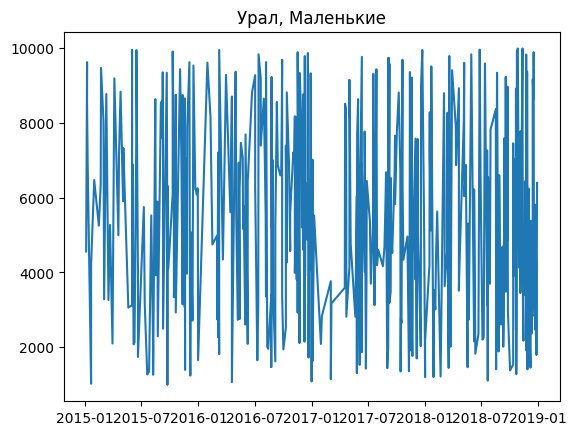

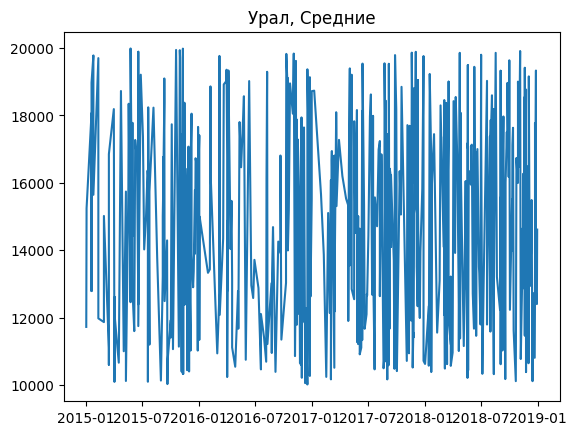

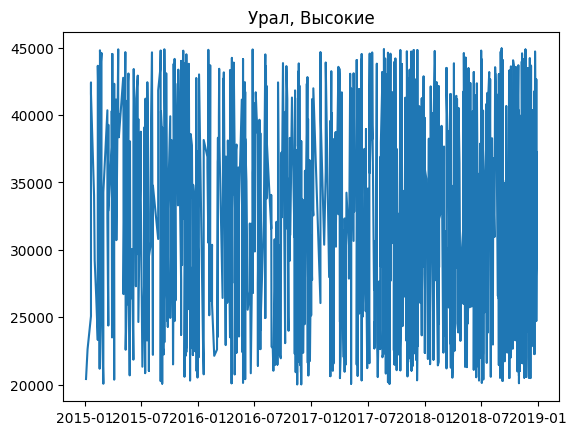

<Figure size 640x480 with 0 Axes>

In [31]:
grouped_data = data.groupby(['Region', 'Sale_group'])
for (region, group), data in grouped_data:
    plt.plot( data['Order Date'], data['Sales'])
    plt.title(f'{region}, {group}')
    plt.figure()

In [33]:
best_group = data.groupby('Sale_group')['Sales'].sum()
most_profitable_group = best_group.idxmax()
print("Наиболее прибыльная группа:", most_profitable_group)

Наиболее прибыльная группа: Высокие
